### Calculando Drawdown

In [142]:
### Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as dr
import numpy as np
import yfinance as yf 
import datetime as dt
import matplotlib.dates as mdates

In [143]:
yf.pdr_override()

In [144]:
ativos = pd.DataFrame()
list = ['^BVSP', 'BRLUSD=X', 'BTC-USD']
for i in list: ### Loop para querying série histórica
    ativos[i] = dr.get_data_yahoo(i, start='2014-09-18')['Adj Close']
ativos.rename(columns={'^BVSP':'IBOV', 'BRLUSD=X':'BRL/USD', 'BTC-USD':'BITCOIN'}, inplace=True) ### Renomeando colunas
ativos.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,IBOV,BRL/USD,BITCOIN
Date,,,
2014-09-18,58374.0,0.424574,424.440002
2014-09-19,57789.0,0.423155,394.795990
2014-09-22,56818.0,0.422833,402.152008
2014-09-23,56541.0,0.417415,435.790985
2014-09-24,56824.0,0.414989,423.204987


#### Drawdown

In [166]:
drawdown = pd.DataFrame()
for i in ativos.columns:
    roll = pd.DataFrame()
    roll[i] = ativos[i].rolling(len(ativos), min_periods=1).max()
    drawdown[i] = ativos[i]/roll[i] - 1
drawdown.dropna(inplace=True)

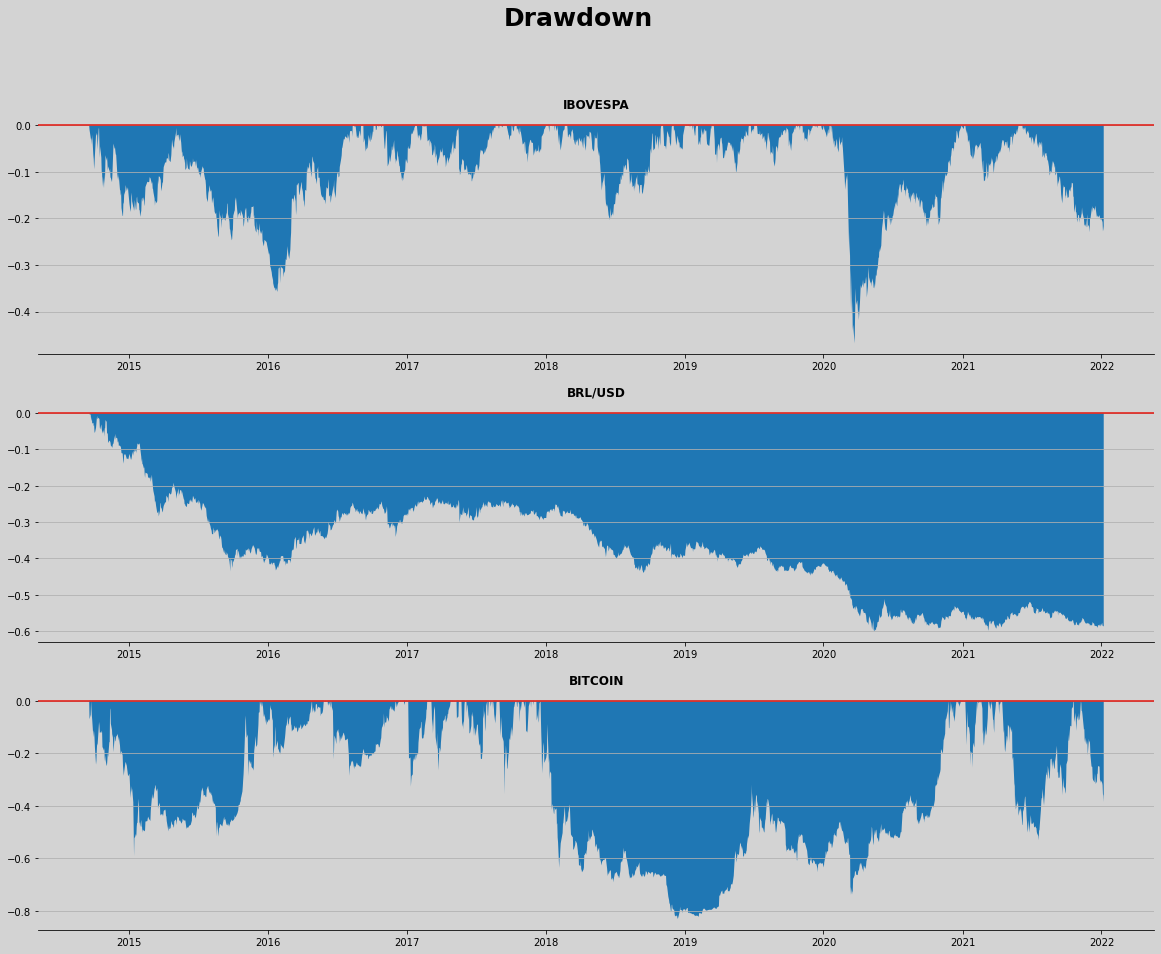

In [167]:
### Configurações do gráfico
fig, ax = plt.subplots(3, 1, figsize=(20, 15), facecolor='#D3D3D3')
fig.suptitle('Drawdown', fontsize=25, fontweight="bold")

### Primeiro gráfico
ax[0].set_facecolor('#D3D3D3')
ax[0].axhline(y=0, color="#e3120b", linewidth=1.5)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_title('IBOVESPA', fontweight="bold")
ax[0].grid(axis='y')
ax[0].fill_between(drawdown.index, drawdown['IBOV'], alpha=1)

### Segundo gráfico
ax[1].set_facecolor('#D3D3D3')
ax[1].axhline(y=0, color="#e3120b", linewidth=1.5)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_title('BRL/USD', fontweight="bold")
ax[1].grid(axis='y')
ax[1].fill_between(drawdown.index, drawdown['BRL/USD'], alpha=1)

### Terceiro gráfico
ax[2].set_facecolor('#D3D3D3')
ax[2].axhline(y=0, color="#e3120b", linewidth=1.5)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].set_title('BITCOIN', fontweight="bold")
ax[2].grid(axis='y')
ax[2].fill_between(drawdown.index, drawdown['BITCOIN'], alpha=1)

